Default Accuracy (10 trees): 0.8182
Confusion Matrix (10 trees):
[[6782  632]
 [1144 1211]]

Best Accuracy: 0.8335 with 80 trees


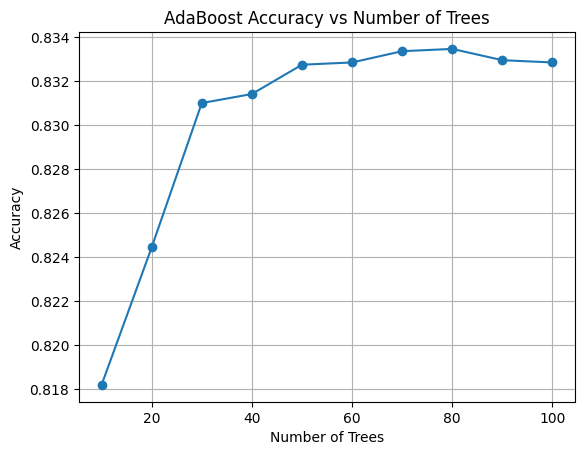

In [ ]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

df = pd.read_csv('/content/income.csv')

df = df.dropna()
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

X = df.drop('income_level', axis=1)
y = df['income_level']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model_default = AdaBoostClassifier(n_estimators=80, random_state=42)
model_default.fit(X_train, y_train)
y_pred_default = model_default.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)
conf_matrix_default = confusion_matrix(y_test, y_pred_default)

print(f"Default Accuracy (10 trees): {accuracy_default:.4f}")
print("Confusion Matrix (10 trees):")
print(conf_matrix_default)

best_accuracy = 0
best_n = 0
accuracy_scores = []

for n in range(10, 101, 10):
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

    if acc > best_accuracy:
        best_accuracy = acc
        best_n = n

print(f"\nBest Accuracy: {best_accuracy:.4f} with {best_n} trees")

plt.plot(range(10, 101, 10), accuracy_scores, marker='o')
plt.title('AdaBoost Accuracy vs Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
